## Week 2_Day 2: KNN

### Library Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing

In [2]:
#loading the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
dfc = cancer.frame
dfc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
dfc.shape

(569, 31)

In [4]:
x = dfc.drop(columns=['target'])
y = dfc['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=69, stratify=y
)

In [9]:
# KNN classifier without scalling
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(x_train, y_train)

y_pred_raw = knn_raw.predict(x_test)

raw_acc = accuracy_score(y_test, y_pred_raw)
print("Accuracy without scaling:", raw_acc)

Accuracy without scaling: 0.9122807017543859


In [13]:
# KNN classifier with Pipeline and Standard Scaler
knn_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_scaled.fit(x_train, y_train)

y_pred = knn_scaled.predict(x_test)
scaled_acc = accuracy_score(y_test, y_pred)
print("Accuracy with scaling:", scaled_acc)

Accuracy with scaling: 0.9736842105263158


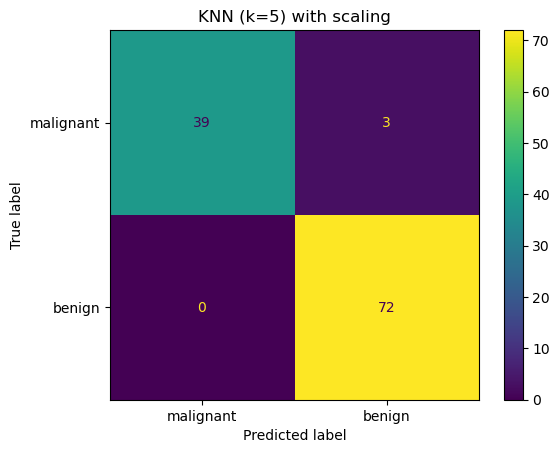

In [15]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot()
plt.title("KNN (k=5) with scaling")
plt.show()

In [24]:
# trying multiple k values and evaluating 
k_values = [1, 3, 5, 7, 11, 15, 21]
results = []

for k in k_values:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    print(f"k={k:2d} -> accuracy={acc:.4f}")


k= 1 -> accuracy=0.9649
k= 3 -> accuracy=0.9737
k= 5 -> accuracy=0.9737
k= 7 -> accuracy=0.9737
k=11 -> accuracy=0.9737
k=15 -> accuracy=0.9737
k=21 -> accuracy=0.9825


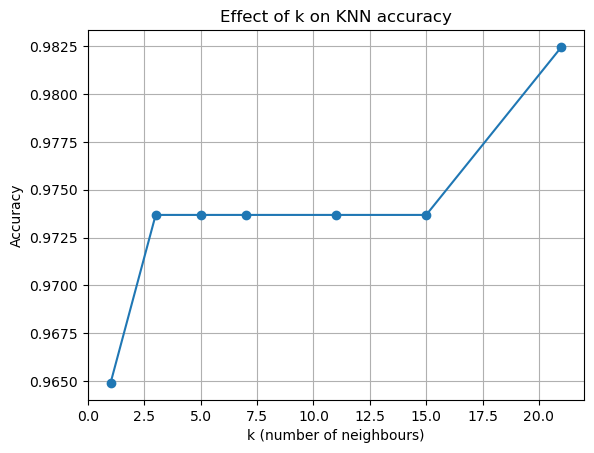

In [23]:
# plotting the changes of accuracy over the changed of K-values
ks = [r[0] for r in results]
accs = [r[1] for r in results]

plt.plot(ks, accs, marker="o")
plt.xlabel("k (number of neighbours)")
plt.ylabel("Accuracy")
plt.title("Effect of k on KNN accuracy")
plt.grid(True)
plt.show()

In [22]:
# modifying with uniform and distance 
for w in ["uniform", "distance"]:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=5, weights=w))
    ])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"weights={w:8s} -> accuracy={acc:.8f}")

weights=uniform  -> accuracy=0.97368421
weights=distance -> accuracy=0.97368421
